## Problem Statement 4
### Implement the CNN model for classifying CIFAR10 image dataset by dividing the model into following 4 stages: 
    a. Loading and preprocessing the image data 
    b. Defining the model's architecture 
    c. Training the model
    d. Estimating the model's performance

In [1]:
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## a. Loading and preprocessing the data.

In [2]:
((train_images, train_labels),(test_images, test_labels))=cifar10.load_data()

In [3]:
train_images=train_images/255.0
test_images=test_images/255.0

In [4]:
type(train_images)

numpy.ndarray

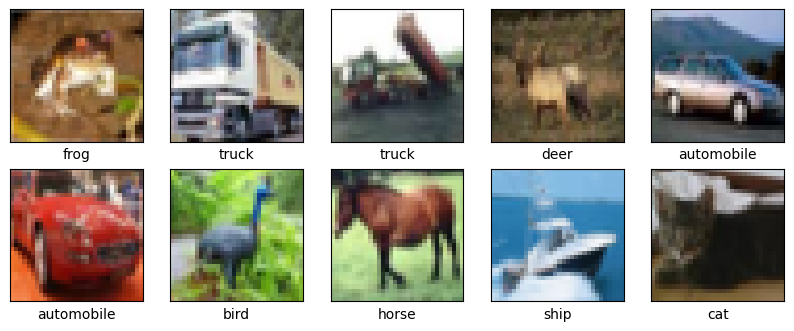

In [30]:
class_names = ['airplpane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## b. Defining the model's architecture 

In [19]:
model = models.Sequential()

In [20]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

# Training the model

In [22]:
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import SGD
sgd=SGD(0.01)

In [23]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

In [24]:
epoch=10
h=model.fit(train_images,train_labels, validation_data=(test_images,test_labels), epochs=epoch)

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.0791 - accuracy: 0.2329 - val_loss: 1.8849 - val_accuracy: 0.3084
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7209 - accuracy: 0.3761 - val_loss: 1.6119 - val_accuracy: 0.4090
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5020 - accuracy: 0.4591 - val_loss: 1.4307 - val_accuracy: 0.4899
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3933 - accuracy: 0.5014 - val_loss: 1.3612 - val_accuracy: 0.5177
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3136 - accuracy: 0.5309 - val_loss: 1.3023 - val_accuracy: 0.5340
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2445 - accuracy: 0.5586 - val_loss: 1.2229 - val_accuracy: 0.5614
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1859 - accuracy: 0.5804 - val_loss: 1.2144 -

# Model performance

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 1.0886 - accuracy: 0.6123
Test Loss: 1.0886400938034058, Test Accuracy: 0.6122999787330627


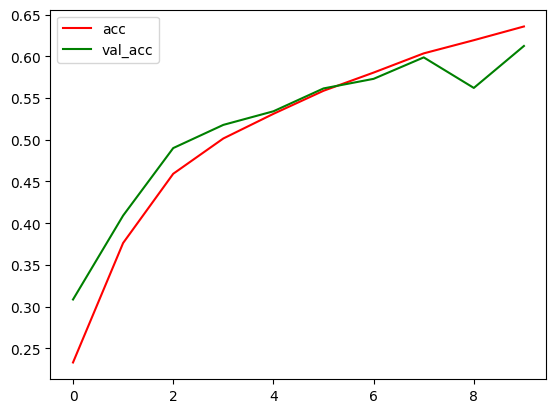

In [26]:
plt.plot(h.history['accuracy'], label='acc', color='red')
plt.plot(h.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [27]:
print(h.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


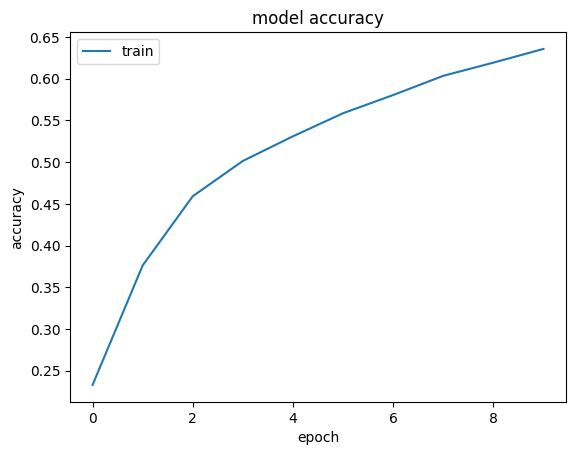

In [28]:
plt.plot(h.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


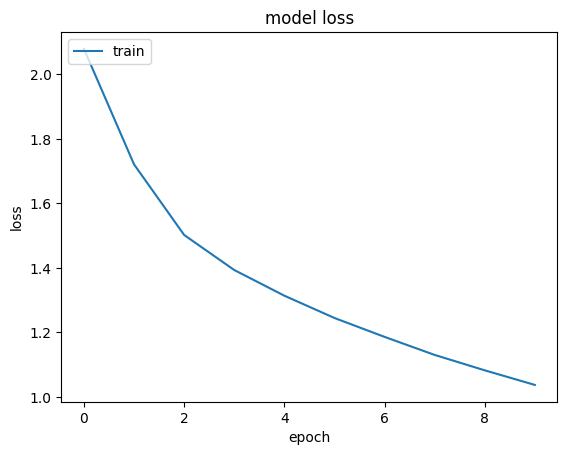

In [29]:
plt.plot(h.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 24ms/step
2


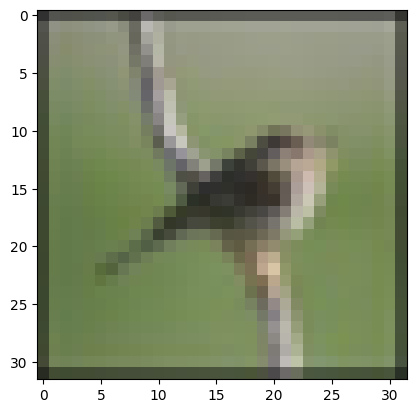

In [36]:
image_index = 3333
plt.imshow(test_images[image_index].reshape(32, 32, 3),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 32, 32, 3))
print(pred.argmax())